<a href="https://colab.research.google.com/github/AusafMo/NoteBook-Medicinal-Herb-Model-ResNet/blob/main/Medicinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/medicinal/leaf.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/leaf') #Extracts the files into the /tmp folder
zip_ref.close()

In [2]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14


---
# **Importing Files**
Restructering and Renaming Directories
---



In [3]:
ImagePATH = f"/leaf/"

In [4]:
from glob import glob
types = glob(ImagePATH+"*")

In [5]:
print(types)

['/leaf/Piper Betle (Betel)', '/leaf/Alpinia Galanga (Rasna)', '/leaf/Hibiscus Rosa-sinensis', '/leaf/Mangifera Indica (Mango)', '/leaf/Murraya Koenigii (Curry)', '/leaf/Basella Alba (Basale)', '/leaf/Brassica Juncea (Indian Mustard)', '/leaf/Citrus Limon (Lemon)', '/leaf/Psidium Guajava (Guava)', '/leaf/Moringa Oleifera (Drumstick)', '/leaf/Trigonella Foenum-graecum (Fenugreek)', '/leaf/Nerium Oleander (Oleander)', '/leaf/Pongamia Pinnata (Indian Beech)', '/leaf/Ocimum Tenuiflorum (Tulsi)', '/leaf/Muntingia Calabura (Jamaica Cherry-Gasagase)', '/leaf/Amaranthus Viridis (Arive-Dantu)', '/leaf/Plectranthus Amboinicus (Mexican Mint)', '/leaf/Syzygium Cumini (Jamun)', '/leaf/Azadirachta Indica (Neem)', '/leaf/Tabernaemontana Divaricata (Crape Jasmine)', '/leaf/Nyctanthes Arbor-tristis (Parijata)', '/leaf/Ficus Auriculata (Roxburgh fig)', '/leaf/Santalum Album (Sandalwood)', '/leaf/Jasminum (Jasmine)', '/leaf/Syzygium Jambos (Rose Apple)', '/leaf/Artocarpus Heterophyllus (Jackfruit)', '/le

In [6]:
# Making DATAFRAME

filedf = pd.DataFrame()
for typ in types:
    files = glob(typ + "/*" )
    tempdf = pd.DataFrame( { 'filepath' : files, 'types':typ.split("/")[-1]} )
    filedf = pd.concat( [ filedf, tempdf ] )

In [7]:
print(filedf)

                                  filepath                types
0   /leaf/Piper Betle (Betel)/PB-S-026.jpg  Piper Betle (Betel)
1   /leaf/Piper Betle (Betel)/PB-S-024.jpg  Piper Betle (Betel)
2   /leaf/Piper Betle (Betel)/PB-S-048.jpg  Piper Betle (Betel)
3   /leaf/Piper Betle (Betel)/PB-S-023.jpg  Piper Betle (Betel)
4   /leaf/Piper Betle (Betel)/PB-S-004.jpg  Piper Betle (Betel)
..                                     ...                  ...
92         /leaf/Mentha (Mint)/M-S-037.jpg        Mentha (Mint)
93         /leaf/Mentha (Mint)/M-S-089.jpg        Mentha (Mint)
94         /leaf/Mentha (Mint)/M-S-061.jpg        Mentha (Mint)
95         /leaf/Mentha (Mint)/M-S-046.jpg        Mentha (Mint)
96         /leaf/Mentha (Mint)/M-S-067.jpg        Mentha (Mint)

[1835 rows x 2 columns]


### ***Grouping the types and arranging them by their count ( number of samples )***

In [8]:
gby_cnt = filedf.groupby( "types" ).aggregate( 'count' ).rename( columns = {'filepath' : 'cnt' } ).reset_index().sort_values( by = 'cnt', ascending = False )

In [9]:
gby_cnt

,types,cnt
1,Amaranthus Viridis (Arive-Dantu),122
4,Basella Alba (Basale),103
13,Mentha (Mint),97
24,Punica Granatum (Pomegranate),79
14,Moringa Oleifera (Drumstick),77
6,Carissa Carandas (Karanda),74
11,Jasminum (Jasmine),71
23,Psidium Guajava (Guava),65
9,Ficus Religiosa (Peepal Tree),63
17,Nerium Oleander (Oleander),62


In [10]:
fig = px.bar( gby_cnt, x = 'types', y = 'cnt', color = 'types', title = 'Counts from Each Types')
fig.show()

In [11]:
!mkdir outputs

In [12]:
gby_cnt.to_csv(f"outputs/types_counts.csv", index = None )

# **Checking Some Data Samples**

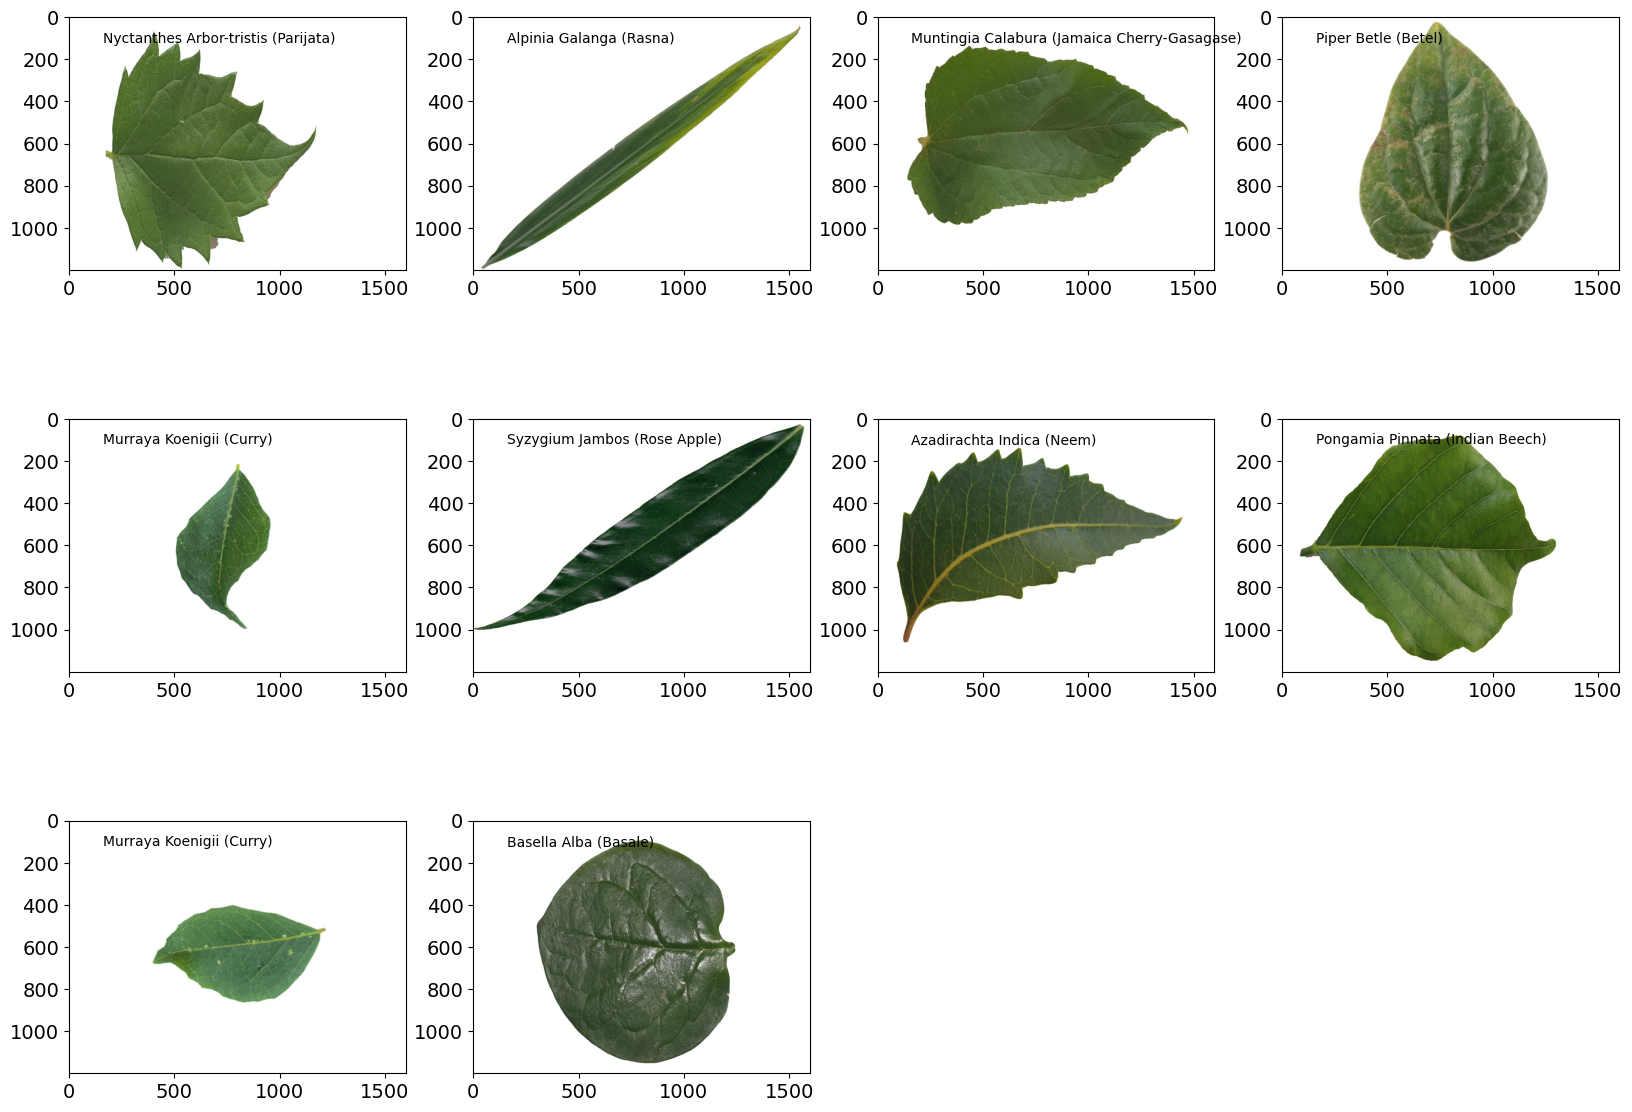

In [13]:
plt.figure( figsize = ( 20, 20 ) )

for i in range(10):

    path = filedf.sample( 1 )['filepath'].values[0]
    types = path.split( "/" )[2]
    ex_img = Image.open(path)
    ax = plt.subplot( 4, 4, i + 1 )
    ax.annotate( types, xy = ( 0.1, 0.9 ), xycoords = " axes fraction ", weight = 'light', size = 10 )
    ax.imshow(ex_img)

plt.show()

# **Splitting the DataSet into Train Test Split**

In [14]:
print("dataframe length:", len(filedf))

print(filedf.types.value_counts().head(10))

print("total samples: ", filedf.types.value_counts().sum())


dataframe length: 1835
Amaranthus Viridis (Arive-Dantu)    122
Basella Alba (Basale)               103
Mentha (Mint)                        97
Punica Granatum (Pomegranate)        79
Moringa Oleifera (Drumstick)         77
Carissa Carandas (Karanda)           74
Jasminum (Jasmine)                   71
Psidium Guajava (Guava)              65
Ficus Religiosa (Peepal Tree)        63
Mangifera Indica (Mango)             62
Name: types, dtype: int64
total samples:  1835


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(
        filedf, filedf['types'], stratify = filedf['types'], test_size=0.4)

X_test, X_val, Y_test, Y_val = train_test_split(
        X_test, X_test['types'], stratify = X_test['types'], test_size=0.5)

In [16]:
X_train

,filepath,types
49,/leaf/Mentha (Mint)/M-S-045.jpg,Mentha (Mint)
25,/leaf/Hibiscus Rosa-sinensis/HR-S-016.jpg,Hibiscus Rosa-sinensis
34,/leaf/Nyctanthes Arbor-tristis (Parijata)/NA-S...,Nyctanthes Arbor-tristis (Parijata)
28,/leaf/Mentha (Mint)/M-S-090.jpg,Mentha (Mint)
8,/leaf/Mentha (Mint)/M-S-032.jpg,Mentha (Mint)
...,...,...
32,/leaf/Amaranthus Viridis (Arive-Dantu)/AV-S-09...,Amaranthus Viridis (Arive-Dantu)
24,/leaf/Brassica Juncea (Indian Mustard)/BJ-S-02...,Brassica Juncea (Indian Mustard)
19,/leaf/Piper Betle (Betel)/PB-S-044.jpg,Piper Betle (Betel)
45,/leaf/Syzygium Jambos (Rose Apple)/SJ-S-013.jpg,Syzygium Jambos (Rose Apple)


In [17]:
X_test

,filepath,types
45,/leaf/Azadirachta Indica (Neem)/AI-S-025.jpg,Azadirachta Indica (Neem)
54,/leaf/Amaranthus Viridis (Arive-Dantu)/AV-S-03...,Amaranthus Viridis (Arive-Dantu)
44,/leaf/Moringa Oleifera (Drumstick)/MO-S-036.jpg,Moringa Oleifera (Drumstick)
51,/leaf/Citrus Limon (Lemon)/CL-S-024.jpg,Citrus Limon (Lemon)
6,/leaf/Mangifera Indica (Mango)/MI-S-058.jpg,Mangifera Indica (Mango)
...,...,...
43,/leaf/Piper Betle (Betel)/PB-S-031.jpg,Piper Betle (Betel)
8,/leaf/Hibiscus Rosa-sinensis/HR-S-041.jpg,Hibiscus Rosa-sinensis
53,/leaf/Artocarpus Heterophyllus (Jackfruit)/AH-...,Artocarpus Heterophyllus (Jackfruit)
25,/leaf/Jasminum (Jasmine)/J-S-047.jpg,Jasminum (Jasmine)


In [18]:
Y_train

49                          Mentha (Mint)
25                 Hibiscus Rosa-sinensis
34    Nyctanthes Arbor-tristis (Parijata)
28                          Mentha (Mint)
8                           Mentha (Mint)
                     ...                 
32       Amaranthus Viridis (Arive-Dantu)
24       Brassica Juncea (Indian Mustard)
19                    Piper Betle (Betel)
45           Syzygium Jambos (Rose Apple)
42        Ficus Auriculata (Roxburgh fig)
Name: types, Length: 1101, dtype: object

In [19]:
Y_test

45               Azadirachta Indica (Neem)
54        Amaranthus Viridis (Arive-Dantu)
44            Moringa Oleifera (Drumstick)
51                    Citrus Limon (Lemon)
6                 Mangifera Indica (Mango)
                      ...                 
43                     Piper Betle (Betel)
8                   Hibiscus Rosa-sinensis
53    Artocarpus Heterophyllus (Jackfruit)
25                      Jasminum (Jasmine)
43        Amaranthus Viridis (Arive-Dantu)
Name: types, Length: 367, dtype: object

In [20]:
X_val

,filepath,types
7,/leaf/Amaranthus Viridis (Arive-Dantu)/AV-S-02...,Amaranthus Viridis (Arive-Dantu)
26,/leaf/Syzygium Jambos (Rose Apple)/SJ-S-009.jpg,Syzygium Jambos (Rose Apple)
31,/leaf/Tabernaemontana Divaricata (Crape Jasmin...,Tabernaemontana Divaricata (Crape Jasmine)
27,/leaf/Tabernaemontana Divaricata (Crape Jasmin...,Tabernaemontana Divaricata (Crape Jasmine)
33,/leaf/Hibiscus Rosa-sinensis/HR-S-029.jpg,Hibiscus Rosa-sinensis
...,...,...
10,/leaf/Tabernaemontana Divaricata (Crape Jasmin...,Tabernaemontana Divaricata (Crape Jasmine)
17,/leaf/Punica Granatum (Pomegranate)/PG-S-063.jpg,Punica Granatum (Pomegranate)
38,/leaf/Amaranthus Viridis (Arive-Dantu)/AV-S-09...,Amaranthus Viridis (Arive-Dantu)
32,/leaf/Moringa Oleifera (Drumstick)/MO-S-032.jpg,Moringa Oleifera (Drumstick)


In [21]:
Y_val

7               Amaranthus Viridis (Arive-Dantu)
26                  Syzygium Jambos (Rose Apple)
31    Tabernaemontana Divaricata (Crape Jasmine)
27    Tabernaemontana Divaricata (Crape Jasmine)
33                        Hibiscus Rosa-sinensis
                         ...                    
10    Tabernaemontana Divaricata (Crape Jasmine)
17                 Punica Granatum (Pomegranate)
38              Amaranthus Viridis (Arive-Dantu)
32                  Moringa Oleifera (Drumstick)
3                          Basella Alba (Basale)
Name: types, Length: 367, dtype: object

In [22]:
X_train['use'] = 'train'
X_val['use'] = 'val'
X_test['use'] = 'test'

In [23]:
fulldf = pd.concat([ X_train, X_test, X_val ])

In [24]:
fulldf.use.value_counts()


train    1101
test      367
val       367
Name: use, dtype: int64

#### Final DATFRAME

In [25]:
fulldf.head(20)

,filepath,types,use
49,/leaf/Mentha (Mint)/M-S-045.jpg,Mentha (Mint),train
25,/leaf/Hibiscus Rosa-sinensis/HR-S-016.jpg,Hibiscus Rosa-sinensis,train
34,/leaf/Nyctanthes Arbor-tristis (Parijata)/NA-S...,Nyctanthes Arbor-tristis (Parijata),train
28,/leaf/Mentha (Mint)/M-S-090.jpg,Mentha (Mint),train
8,/leaf/Mentha (Mint)/M-S-032.jpg,Mentha (Mint),train
48,/leaf/Mangifera Indica (Mango)/MI-S-041.jpg,Mangifera Indica (Mango),train
42,/leaf/Pongamia Pinnata (Indian Beech)/PP-S-039...,Pongamia Pinnata (Indian Beech),train
12,/leaf/Plectranthus Amboinicus (Mexican Mint)/P...,Plectranthus Amboinicus (Mexican Mint),train
11,/leaf/Ficus Auriculata (Roxburgh fig)/FA-S-022...,Ficus Auriculata (Roxburgh fig),train
48,/leaf/Ocimum Tenuiflorum (Tulsi)/OT-S-024.jpg,Ocimum Tenuiflorum (Tulsi),train


##### BASELINE ACCURACY

In [26]:
fulldf.types.value_counts()[0] / len( fulldf ) ## basically which sample dominates

0.0664850136239782

### **Creating Train, Test, Validation Folders**

In [27]:
!mkdir data
!rm -rf data/
!rm -rf data/train
!rm -rf data/test
!rm -rf data/val
!mkdir data/
!mkdir data/train
!mkdir data/test
!mkdir data/val

In [28]:
fulldf.types.unique()

array(['Mentha (Mint)', 'Hibiscus Rosa-sinensis',
       'Nyctanthes Arbor-tristis (Parijata)', 'Mangifera Indica (Mango)',
       'Pongamia Pinnata (Indian Beech)',
       'Plectranthus Amboinicus (Mexican Mint)',
       'Ficus Auriculata (Roxburgh fig)', 'Ocimum Tenuiflorum (Tulsi)',
       'Murraya Koenigii (Curry)', 'Carissa Carandas (Karanda)',
       'Azadirachta Indica (Neem)', 'Moringa Oleifera (Drumstick)',
       'Alpinia Galanga (Rasna)', 'Artocarpus Heterophyllus (Jackfruit)',
       'Piper Betle (Betel)', 'Nerium Oleander (Oleander)',
       'Jasminum (Jasmine)', 'Psidium Guajava (Guava)',
       'Brassica Juncea (Indian Mustard)', 'Basella Alba (Basale)',
       'Ficus Religiosa (Peepal Tree)', 'Punica Granatum (Pomegranate)',
       'Amaranthus Viridis (Arive-Dantu)', 'Syzygium Jambos (Rose Apple)',
       'Citrus Limon (Lemon)', 'Syzygium Cumini (Jamun)',
       'Santalum Album (Sandalwood)',
       'Muntingia Calabura (Jamaica Cherry-Gasagase)',
       'Trigonella Foen

In [29]:
for typ in fulldf.types.unique():
    os.system(f"mkdir data/train/'{typ}'")
    os.system(f"mkdir data/test/'{typ}'")
    os.system(f"mkdir data/val/'{typ}'")

In [30]:
fulldf.head()

,filepath,types,use
49,/leaf/Mentha (Mint)/M-S-045.jpg,Mentha (Mint),train
25,/leaf/Hibiscus Rosa-sinensis/HR-S-016.jpg,Hibiscus Rosa-sinensis,train
34,/leaf/Nyctanthes Arbor-tristis (Parijata)/NA-S...,Nyctanthes Arbor-tristis (Parijata),train
28,/leaf/Mentha (Mint)/M-S-090.jpg,Mentha (Mint),train
8,/leaf/Mentha (Mint)/M-S-032.jpg,Mentha (Mint),train


In [31]:
for i, row in fulldf.iterrows():

    # plant category
    typ = row['types']

    # section is train,val or test
    section = row['use']

    # input filepath to copy
    ipath = row['filepath']

    # output filepath to paste
    opath = ipath.replace(f"/leaf/",f"data/{section}/")


    # running the cp command
    os.system(f"cp '{ipath}' '{opath}'")

# **Data Preprocessing**


### **Transforms**
In order to use our images with a network trained on the Imagenet dataset, we need to preprocess our images in the same way as the Imagenet network. For that, we need to rescale the images to 224×224 and normalize them as per Imagenet standards. We can use the torchvision transforms library to do that. Here we take a CenterCrop of 224×224 and normalize as per Imagenet standards.

# **PLANT MODEL**

In [32]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn

from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn
import numpy as np
import tqdm

In [33]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [34]:
from torch import Tensor, nn
from torch.nn.functional import interpolate

In [35]:
def imshow_tensor(image, ax=None, title=None):
    """Imshow for Tensor."""

    if ax is None:
        fig, ax = plt.subplots()

    # Set the color channel as the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the preprocessing steps
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip the image pixel values
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image

In [36]:
traindir = f"data/train"
validdir = f"data/val"
testdir = f"data/test"

In [37]:
os.listdir('data/train/')

['Piper Betle (Betel)',
 'Alpinia Galanga (Rasna)',
 'Hibiscus Rosa-sinensis',
 'Mangifera Indica (Mango)',
 'Murraya Koenigii (Curry)',
 'Basella Alba (Basale)',
 'Brassica Juncea (Indian Mustard)',
 'Citrus Limon (Lemon)',
 'Psidium Guajava (Guava)',
 'Moringa Oleifera (Drumstick)',
 'Trigonella Foenum-graecum (Fenugreek)',
 'Nerium Oleander (Oleander)',
 'Pongamia Pinnata (Indian Beech)',
 'Ocimum Tenuiflorum (Tulsi)',
 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 'Amaranthus Viridis (Arive-Dantu)',
 'Plectranthus Amboinicus (Mexican Mint)',
 'Syzygium Cumini (Jamun)',
 'Azadirachta Indica (Neem)',
 'Tabernaemontana Divaricata (Crape Jasmine)',
 'Nyctanthes Arbor-tristis (Parijata)',
 'Ficus Auriculata (Roxburgh fig)',
 'Santalum Album (Sandalwood)',
 'Jasminum (Jasmine)',
 'Syzygium Jambos (Rose Apple)',
 'Artocarpus Heterophyllus (Jackfruit)',
 'Ficus Religiosa (Peepal Tree)',
 'Punica Granatum (Pomegranate)',
 'Carissa Carandas (Karanda)',
 'Mentha (Mint)']

In [38]:
save_file_name = f'resnet50-transfer.pt'
checkpoint_path = f'resnet50-transfer.pth'

# Change to fit hardware
batch_size = 512
###### MINE
multi_gpu = False
# Whether to train on a gpu
train_on_gpu = cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False
print(train_on_gpu,multi_gpu)

Train on gpu: True
1 gpus detected.
True False


In [39]:
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'valid':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

        # Test does not use augmentation
    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

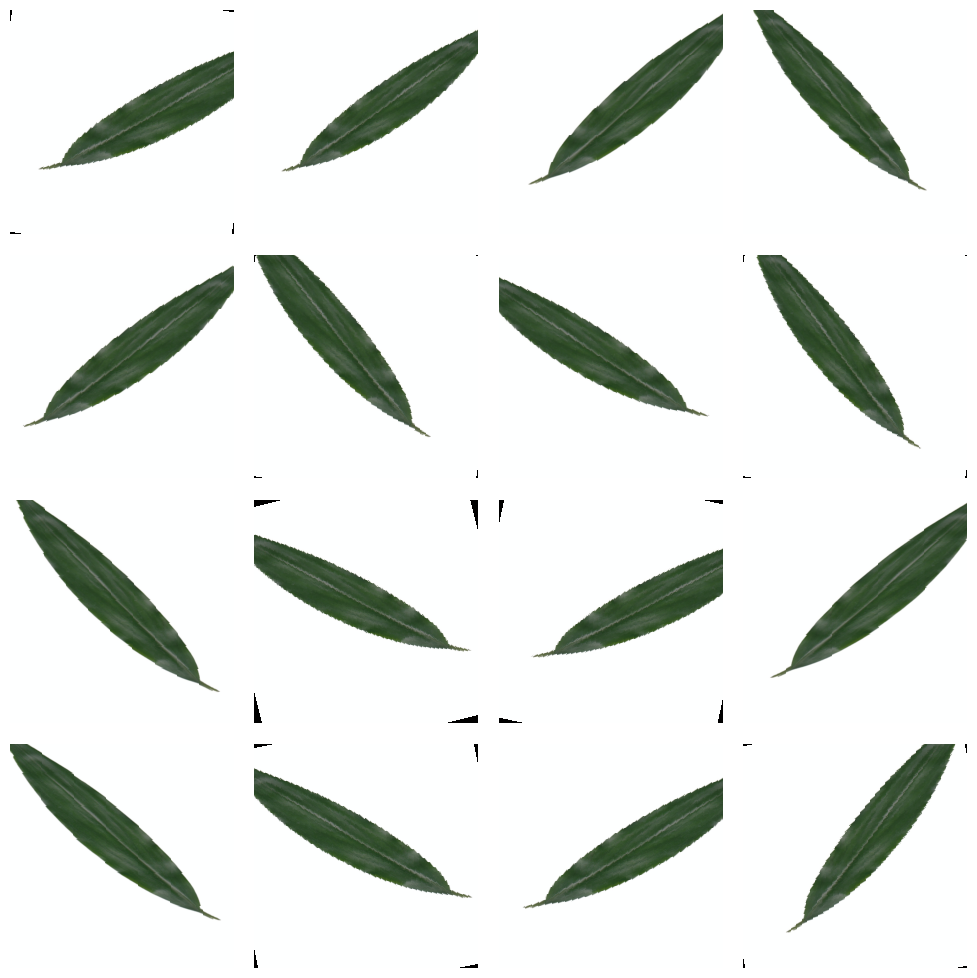

In [41]:
ex_img = Image.open('/content/data/train/Alpinia Galanga (Rasna)/AG-S-001.jpg')

t = image_transforms['train']
plt.figure(figsize=(10, 10))

for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    _ = imshow_tensor(t(ex_img), ax=ax)

plt.tight_layout()

# **DATALOADER**

In [42]:
# Datasets from folders
data = {
    'train':
    datasets.ImageFolder( root = traindir, transform = image_transforms['train'] ),
    'valid':
    datasets.ImageFolder( root = validdir, transform = image_transforms['valid']),
    'test':
    datasets.ImageFolder( root = testdir, transform = image_transforms['test'])
}

# Dataloader iterators, make sure to shuffle
dataloaders = {
    'train': DataLoader( data['train'], batch_size = batch_size, shuffle = True, num_workers = 0 ),
    'val': DataLoader( data['valid'], batch_size = batch_size, shuffle = True, num_workers = 0),
    'test': DataLoader( data['test'], batch_size = batch_size, shuffle = True, num_workers= 0)
}

In [43]:
# Iterate through the dataloader once
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([512, 3, 224, 224]), torch.Size([512]))

In [44]:
categories = []
for d in os.listdir(traindir):
    categories.append(d)

n_classes = len(categories)
print(f'There are {n_classes} different classes.')

There are 30 different classes.


# **Some Statistics**

In [45]:
class_to_idx = data['train'].class_to_idx
idx_to_class = {
    idx: class_
    for class_, idx in data['train'].class_to_idx.items()
}

In [46]:
train_cnts = Counter([idx_to_class[x] for x in data['train'].targets])
val_cnts = Counter([idx_to_class[x] for x in data['valid'].targets])
test_cnts = Counter([idx_to_class[x] for x in data['test'].targets])

In [47]:
train_cnts = pd.DataFrame({'cat' :list(train_cnts.keys()), 'train_cnt': list(train_cnts.values())})
val_cnts = pd.DataFrame({'cat' :list(val_cnts.keys()), 'val_cnt': list(val_cnts.values())})
test_cnts = pd.DataFrame({'cat' :list(test_cnts.keys()), 'test_cnt': list(test_cnts.values())})

In [48]:
cnt_df = pd.merge(train_cnts,val_cnts,on='cat',how='left').merge(test_cnts,on='cat',how='left')

In [49]:
cnt_df.head()

,cat,train_cnt,val_cnt,test_cnt
0,Alpinia Galanga (Rasna),30,10,10
1,Amaranthus Viridis (Arive-Dantu),73,25,24
2,Artocarpus Heterophyllus (Jackfruit),33,11,12
3,Azadirachta Indica (Neem),36,12,12
4,Basella Alba (Basale),62,21,20


In [50]:
idx_to_class

{0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Viridis (Arive-Dantu)',
 2: 'Artocarpus Heterophyllus (Jackfruit)',
 3: 'Azadirachta Indica (Neem)',
 4: 'Basella Alba (Basale)',
 5: 'Brassica Juncea (Indian Mustard)',
 6: 'Carissa Carandas (Karanda)',
 7: 'Citrus Limon (Lemon)',
 8: 'Ficus Auriculata (Roxburgh fig)',
 9: 'Ficus Religiosa (Peepal Tree)',
 10: 'Hibiscus Rosa-sinensis',
 11: 'Jasminum (Jasmine)',
 12: 'Mangifera Indica (Mango)',
 13: 'Mentha (Mint)',
 14: 'Moringa Oleifera (Drumstick)',
 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 16: 'Murraya Koenigii (Curry)',
 17: 'Nerium Oleander (Oleander)',
 18: 'Nyctanthes Arbor-tristis (Parijata)',
 19: 'Ocimum Tenuiflorum (Tulsi)',
 20: 'Piper Betle (Betel)',
 21: 'Plectranthus Amboinicus (Mexican Mint)',
 22: 'Pongamia Pinnata (Indian Beech)',
 23: 'Psidium Guajava (Guava)',
 24: 'Punica Granatum (Pomegranate)',
 25: 'Santalum Album (Sandalwood)',
 26: 'Syzygium Cumini (Jamun)',
 27: 'Syzygium Jambos (Rose Apple)',
 28: 

# **MODELS**

In [51]:
model = models.resnet50( weights = 'DEFAULT' )

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 148MB/s]


In [52]:
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

In [53]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [54]:
n_inputs = model.fc.in_features

In [55]:
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256),
                      nn.ReLU(),
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),
                      nn.LogSoftmax(dim=1))

In [56]:
model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=30, bias=True)
  (4): LogSoftmax(dim=1)
)

In [57]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

24,040,286 total parameters.
532,254 training parameters.


In [58]:
if train_on_gpu:
    model = model.to('cuda')

if multi_gpu:
    model = nn.DataParallel(model)

In [59]:
if multi_gpu:
    print(model.module.fc)
else:
    print(model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=30, bias=True)
  (4): LogSoftmax(dim=1)
)


In [60]:
model.class_to_idx = data['train'].class_to_idx
model.idx_to_class = {
    idx: class_
    for class_, idx in model.class_to_idx.items()
}

list(model.idx_to_class.items())

[(0, 'Alpinia Galanga (Rasna)'),
 (1, 'Amaranthus Viridis (Arive-Dantu)'),
 (2, 'Artocarpus Heterophyllus (Jackfruit)'),
 (3, 'Azadirachta Indica (Neem)'),
 (4, 'Basella Alba (Basale)'),
 (5, 'Brassica Juncea (Indian Mustard)'),
 (6, 'Carissa Carandas (Karanda)'),
 (7, 'Citrus Limon (Lemon)'),
 (8, 'Ficus Auriculata (Roxburgh fig)'),
 (9, 'Ficus Religiosa (Peepal Tree)'),
 (10, 'Hibiscus Rosa-sinensis'),
 (11, 'Jasminum (Jasmine)'),
 (12, 'Mangifera Indica (Mango)'),
 (13, 'Mentha (Mint)'),
 (14, 'Moringa Oleifera (Drumstick)'),
 (15, 'Muntingia Calabura (Jamaica Cherry-Gasagase)'),
 (16, 'Murraya Koenigii (Curry)'),
 (17, 'Nerium Oleander (Oleander)'),
 (18, 'Nyctanthes Arbor-tristis (Parijata)'),
 (19, 'Ocimum Tenuiflorum (Tulsi)'),
 (20, 'Piper Betle (Betel)'),
 (21, 'Plectranthus Amboinicus (Mexican Mint)'),
 (22, 'Pongamia Pinnata (Indian Beech)'),
 (23, 'Psidium Guajava (Guava)'),
 (24, 'Punica Granatum (Pomegranate)'),
 (25, 'Santalum Album (Sandalwood)'),
 (26, 'Syzygium Cumini

In [61]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [62]:
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape)

torch.Size([256, 2048])
torch.Size([256])
torch.Size([30, 256])
torch.Size([30])


In [63]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=1):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()

            # Predicted outputs are log probabilities
            output = model(data)

            # Loss and backpropagation of gradients
            loss = criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))

            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))

            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f}        \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))

                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

In [64]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=3,
    n_epochs=100,
    print_every=1)


Starting Training from Scratch.


Epoch: 0 	Training Loss: 3.3472        	Validation Loss: 3.3028
		Training Accuracy: 7.90%	 Validation Accuracy: 6.81%

Epoch: 1 	Training Loss: 3.0198        	Validation Loss: 3.1438
		Training Accuracy: 18.98%	 Validation Accuracy: 14.71%

Epoch: 2 	Training Loss: 2.7009        	Validation Loss: 2.8969
		Training Accuracy: 35.15%	 Validation Accuracy: 41.14%

Epoch: 3 	Training Loss: 2.3836        	Validation Loss: 2.5686
		Training Accuracy: 55.59%	 Validation Accuracy: 57.77%

Epoch: 4 	Training Loss: 2.1020        	Validation Loss: 2.2123
		Training Accuracy: 65.40%	 Validation Accuracy: 68.94%

Epoch: 5 	Training Loss: 1.7827        	Validation Loss: 1.8538
		Training Accuracy: 73.66%	 Validation Accuracy: 77.38%

Epoch: 6 	Training Loss: 1.5258        	Validation Loss: 1.5290
		Training Accuracy: 80.84%	 Validation Accuracy: 84.20%

Epoch: 7 	Training Loss: 1.2813        	Validation Loss: 1.2634
		Training Accuracy: 82.20%	 Validation Accuracy: 

# **Results**

Text(0.5, 1.0, 'Training and Validation Losses')

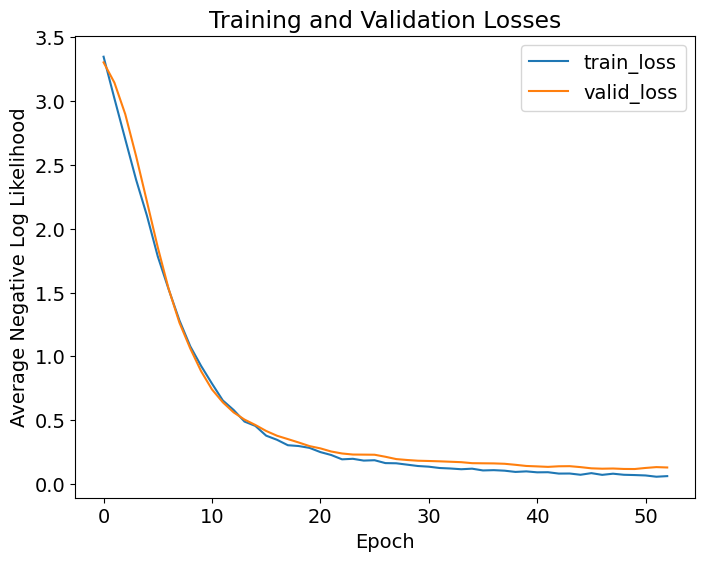

In [65]:
plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')

Text(0.5, 1.0, 'Training and Validation Accuracy')

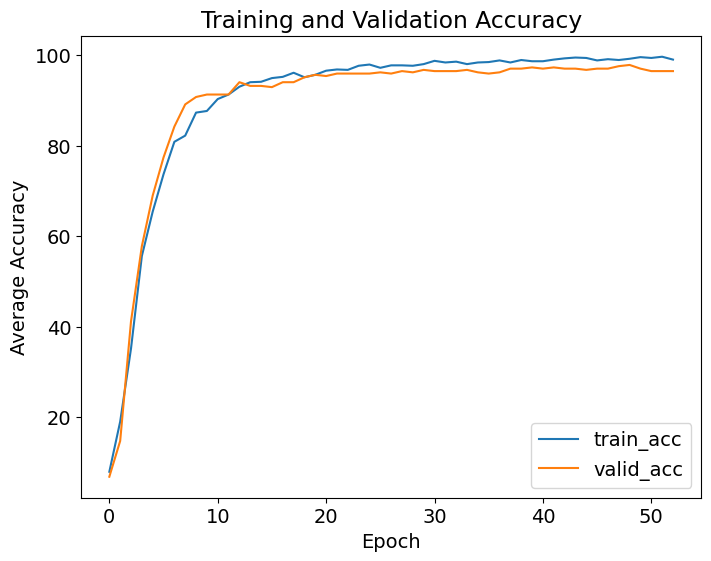

In [66]:
plt.figure(figsize = (8, 6))

for c in ['train_acc', 'valid_acc']:
    plt.plot(100 * history[c], label = c)

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')

# **Save Model**

In [67]:
def save_checkpoint(model, path):

    """Save a PyTorch model checkpoint

    Params
    --------
        model (PyTorch model): model to save
        path (str): location to save model. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Basic details
    checkpoint = {
        'class_to_idx': model.class_to_idx,
        'idx_to_class': model.idx_to_class,
        'epochs': model.epochs,
    }

    # Extract the final classifier and the state dictionary

    if model_name == 'vgg16':

        # Check to see if model was parallelized
        if multi_gpu:
            checkpoint['classifier'] = model.module.classifier
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['classifier'] = model.classifier
            checkpoint['state_dict'] = model.state_dict()

    elif model_name == 'resnet50':
        if multi_gpu:
            checkpoint['fc'] = model.module.fc
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['fc'] = model.fc
            checkpoint['state_dict'] = model.state_dict()

    # Add the optimizer
    checkpoint['optimizer'] = model.optimizer
    checkpoint['optimizer_state_dict'] = model.optimizer.state_dict()

    # Save the data to the path
    torch.save(checkpoint, path)

In [68]:
save_checkpoint(model, path=checkpoint_path)

# **Loading Checkpoints**

In [69]:
def load_checkpoint(path):

    """Load a PyTorch model checkpoint

    Params
    --------
        path (str): saved model checkpoint. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    # Get the model name
    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Load in checkpoint
    checkpoint = torch.load(path)

    if model_name == 'vgg16':
        model = models.vgg16(weights = 'DEFAULT')
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.classifier = checkpoint['classifier']

    elif model_name == 'resnet50':
        model = models.resnet50(weights = 'DEFAULT')
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.fc = checkpoint['fc']

    # Load in the state dict
    model.load_state_dict(checkpoint['state_dict'])

    total_params = sum(p.numel() for p in model.parameters())
    print(f'{total_params:,} total parameters.')
    total_trainable_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad)
    print(f'{total_trainable_params:,} total gradient parameters.')

    # Move to gpu
    if multi_gpu:
        model = nn.DataParallel(model)

    if train_on_gpu:
        model = model.to('cuda')

    # Model basics
    model.class_to_idx = checkpoint['class_to_idx']
    model.idx_to_class = checkpoint['idx_to_class']
    model.epochs = checkpoint['epochs']

    # Optimizer
    optimizer = checkpoint['optimizer']
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    return model, optimizer

In [70]:
model, optimizer = load_checkpoint(path=checkpoint_path)


24,040,286 total parameters.
532,254 total gradient parameters.


# **Inference**

In [71]:
def process_image(image_path):
    """Process an image path into a PyTorch tensor"""

    image = Image.open(image_path)
    # Resize
    img = image.resize((256, 256))

    # Center crop
    width = 256
    height = 256
    new_width = 224
    new_height = 224

    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    img = img.crop((left, top, right, bottom))

    # Convert to numpy, transpose color dimension and normalize
    img = np.array(img).transpose((2, 0, 1)) / 256

    # Standardization
    means = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    stds = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

    img = img - means
    img = img / stds

    img_tensor = torch.Tensor(img)

    return img_tensor

In [72]:
def predict(image_path, model, topk=5):
    """Make a prediction for an image using a trained model

    Params
    --------
        image_path (str): filename of the image
        model (PyTorch model): trained model for inference
        topk (int): number of top predictions to return

    Returns

    """
    real_class = image_path.split('/')[-2]

    # Convert to pytorch tensor
    img_tensor = process_image(image_path)

    # Resize
    if train_on_gpu:
        img_tensor = img_tensor.view(1, 3, 224, 224).cuda()
    else:
        img_tensor = img_tensor.view(1, 3, 224, 224)

    # Set to evaluation
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(img_tensor)
        ps = torch.exp(out)

        # Find the topk predictions
        topk, topclass = ps.topk(topk, dim=1)

        # Extract the actual classes and probabilities
        top_classes = [
            model.idx_to_class[class_] for class_ in topclass.cpu().numpy()[0]
        ]
        top_p = topk.cpu().numpy()[0]

        return img_tensor.cpu().squeeze(), top_p, top_classes, real_class

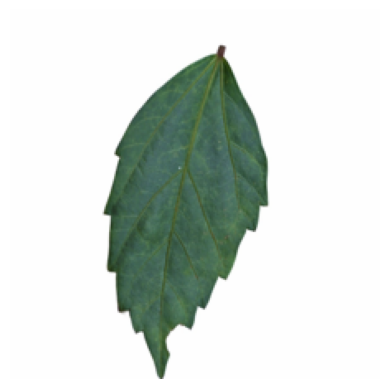

In [73]:
np.random.seed = 100


def random_test_image():
    """Pick a random test image from the test directory"""
    c = np.random.choice(categories)
    root = testdir +"/"+ c + '/'
    img_path = root + np.random.choice(os.listdir(root))
    return img_path


_ = imshow_tensor(process_image(random_test_image()))

In [74]:
img, top_p, top_classes, real_class = predict(random_test_image(), model,topk=2)

In [75]:
top_p, top_classes, real_class

(array([0.96075064, 0.01700847], dtype=float32),
 ['Alpinia Galanga (Rasna)', 'Murraya Koenigii (Curry)'],
 'Alpinia Galanga (Rasna)')

In [76]:
top_p

array([0.96075064, 0.01700847], dtype=float32)

## **Display Preds**

In [77]:
def display_prediction(image_path, model, topk):
    """Display image and preditions from model"""

    # Get predictions
    img, ps, classes, y_obs = predict(image_path, model, topk)
    # Convert results to dataframe for plotting
    result = pd.DataFrame({'p': ps}, index=classes)

    # Show the image
    plt.figure(figsize=(16, 5))
    ax = plt.subplot(1, 2, 1)
    ax, img = imshow_tensor(img, ax=ax)

    # Set title to be the actual class
    ax.set_title(y_obs, size=20)

    ax = plt.subplot(1, 2, 2)
    # Plot a bar plot of predictions
    result.sort_values('p')['p'].plot.barh(color='blue', edgecolor='k', ax=ax)
    plt.xlabel('Predicted Probability')
    plt.tight_layout()

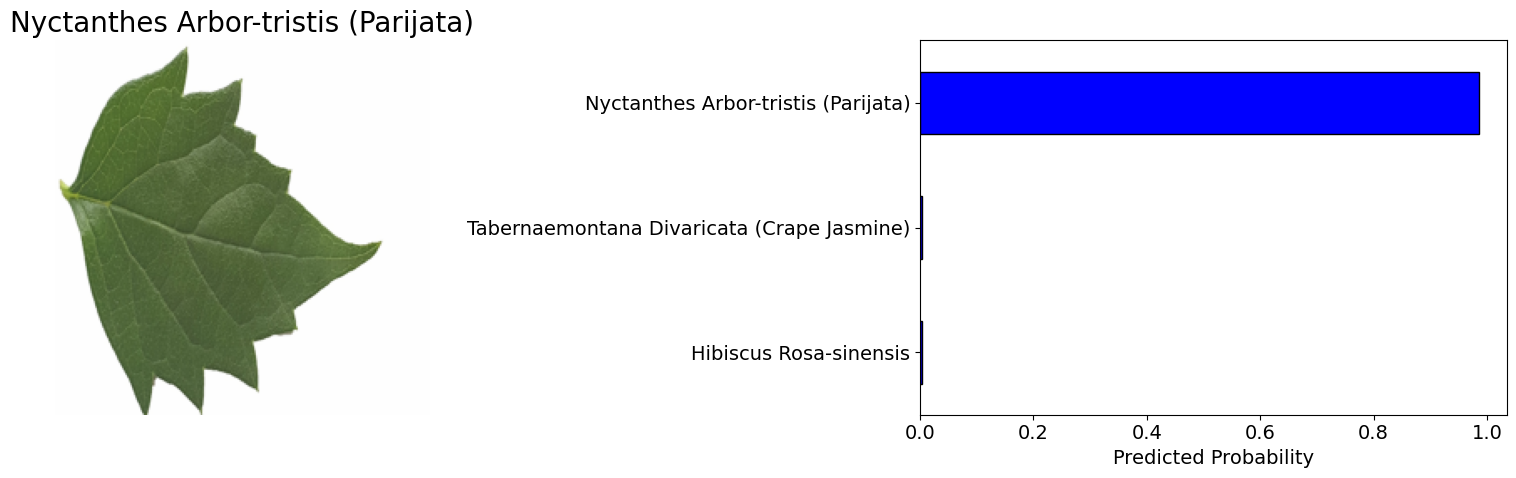

In [78]:
display_prediction(random_test_image(), model, topk=3)

# **Testing Accuracy**

In [79]:
def k_accuracy(output, target, topk=(1, )):
    """Compute the topk accuracy(s)"""
    if train_on_gpu:
        output = output.to('cuda')
        target = target.to('cuda')

    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        # Find the predicted classes and transpose
        _, pred = output.topk(k=maxk, dim=1, largest=True, sorted=True)
        pred = pred.t()

        # Determine predictions equal to the targets
        correct = pred.eq(target.reshape(1, -1).expand_as(pred))

        res = []

        # For each k, find the percentage of correct
        for k in topk:

            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)

            # Precision: TP / (TP + FP)
            precision = correct_k / maxk

            # Recall: TP / (TP + FN)
            recall = correct_k / target.sum()

            # F1-score: 2 * (precision * recall) / (precision + recall)
            f1 = 2 * (precision * recall) / (precision + recall)

            res.append((correct_k.mul_(100.0 / batch_size).item(), precision.item(), recall.item(), f1.item()))


        return res

In [80]:
testiter = iter(dataloaders['test'])
# Get a batch of testing images and labels
features, targets = next(testiter)

if train_on_gpu:
    res = k_accuracy(model(features.to('cuda')), targets, topk=(1, 5))
else:
    res = k_accuracy(model(features), targets, topk=(1, 5))

print(res)
print("first tuple is top 1 and other is top 5, of accuracy, precicion, recall and F1 scores respectively")

[(98.36511993408203, 72.20000457763672, 0.0725628137588501, 0.14497992396354675), (100.0, 73.4000015258789, 0.07376884669065475, 0.14738956093788147)]
first tuple is top 1 and other is top 5, of accuracy, precicion, recall and F1 scores respectively


In [81]:
def accuracy(output, target, topk=(1, )):
    """Compute the topk accuracy(s)"""
    if train_on_gpu:
        output = output.to('cuda')
        target = target.to('cuda')

    with torch.no_grad():
        maxk = max(topk)
        batch_size = target.size(0)

        # Find the predicted classes and transpose
        _, pred = output.topk(k=maxk, dim=1, largest=True, sorted=True)
        pred = pred.t()

        # Determine predictions equal to the targets
        correct = pred.eq(target.reshape(1, -1).expand_as(pred))

        res = []

        # For each k, find the percentage of correct
        for k in topk:
            correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
            res.append(correct_k.mul_(100.0 / batch_size).item())
        return res

## **Function to Evaluate Model Over All Classes**

In [82]:
def evaluate(model, test_loader, criterion, topk=(1, 3, 5)):
    """Measure the performance of a trained PyTorch model

    Params
    --------
        model (PyTorch model): trained cnn for inference
        test_loader (PyTorch DataLoader): test dataloader
        topk (tuple of ints): accuracy to measure

    Returns
    --------
        results (DataFrame): results for each category

    """
    confusion_matrix = torch.zeros(n_classes, n_classes)
    classes = []
    losses = []
    # Hold accuracy results
    acc_results = np.zeros((len(test_loader.dataset), len(topk)))
    i = 0

    model.eval()
    with torch.no_grad():

        # Testing loop
        for data, targets in test_loader:

            # Tensors to gpu
            if train_on_gpu:
                data, targets = data.to('cuda'), targets.to('cuda')

            # Raw model output
            out = model(data)
            _, predscm = torch.max(out, 1)
            for t, p in zip(targets.view(-1), predscm.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

            # Iterate through each example
            for pred, true in zip(out, targets):
                # Find topk accuracy
                acc_results[i, :] = accuracy(
                    pred.unsqueeze(0), true.unsqueeze(0), topk)
                classes.append(model.idx_to_class[true.item()])
                # Calculate the loss
                loss = criterion(pred.view(1, n_classes), true.view(1))
                losses.append(loss.item())
                i += 1

    # Send results to a dataframe and calculate average across classes
    results = pd.DataFrame(acc_results, columns=[f'top{i}' for i in topk])
    results['class'] = classes
    results['loss'] = losses
    results = results.groupby(classes).mean()

    return results.reset_index().rename(columns={'index': 'class'}),confusion_matrix

criterion = nn.NLLLoss()
# Evaluate the model on all the training data
results,confusion_matrix = evaluate(model, dataloaders['test'], criterion)

In [83]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f'outputs/confusion_matrix.png')
    return plt

In [84]:
classnames = [model.idx_to_class[i] for i in range(0,n_classes)]

Confusion matrix, without normalization


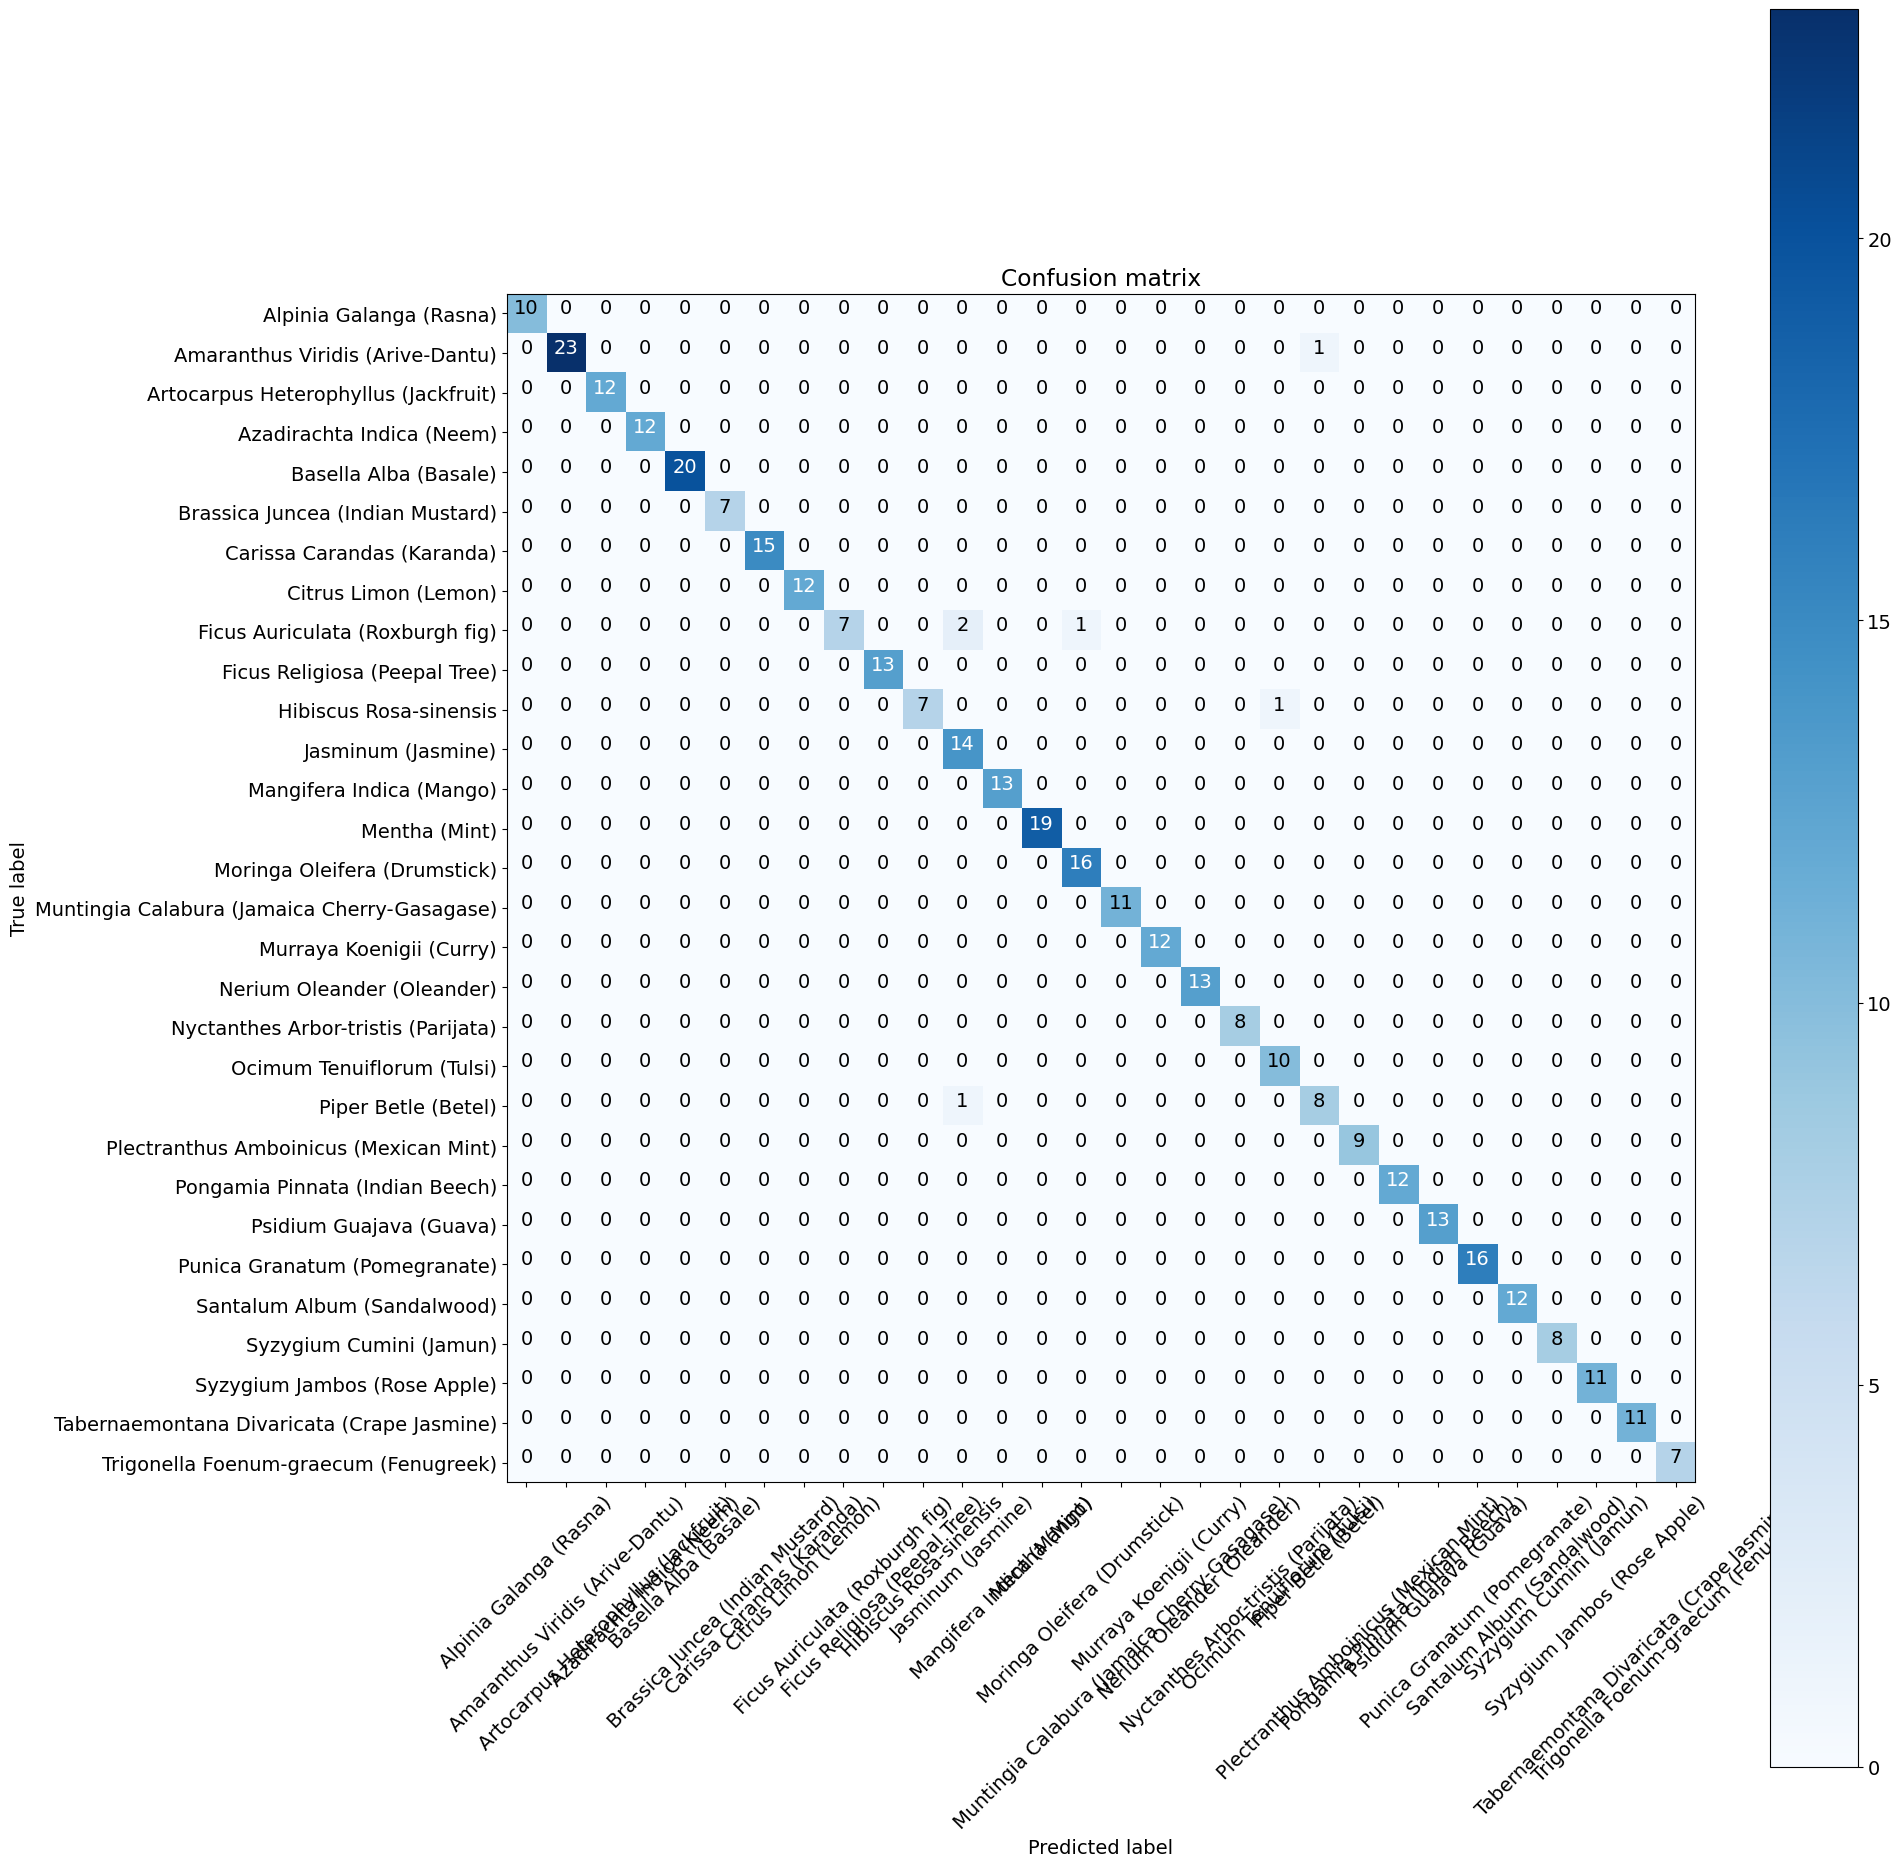

In [85]:
plt.figure(figsize=(20,20))
plt = plot_confusion_matrix(confusion_matrix, classnames)

In [86]:
def cm_as_dataframe(cm):
    cm = pd.DataFrame(cm)
    cm.columns = classnames
    cm.index = classnames
    cm = cm.reset_index()
    return cm

cm_as_dataframe(confusion_matrix.cpu().numpy()).to_csv(f'outputs/confmat.csv',index=None)

In [87]:
print(f"Overall Accuracy:{confusion_matrix.diag().sum()/confusion_matrix.sum()}")

Overall Accuracy:0.9836512207984924


In [88]:
results = results.merge(cnt_df,left_on='class',right_on='cat')

In [89]:
results

,class,top1,top3,top5,loss,cat,train_cnt,val_cnt,test_cnt
0,Alpinia Galanga (Rasna),100.000000,100.0,100.0,0.059931,Alpinia Galanga (Rasna),30,10,10
1,Amaranthus Viridis (Arive-Dantu),95.833333,100.0,100.0,0.164561,Amaranthus Viridis (Arive-Dantu),73,25,24
2,Artocarpus Heterophyllus (Jackfruit),100.000000,100.0,100.0,0.128459,Artocarpus Heterophyllus (Jackfruit),33,11,12
3,Azadirachta Indica (Neem),100.000000,100.0,100.0,0.062982,Azadirachta Indica (Neem),36,12,12
4,Basella Alba (Basale),100.000000,100.0,100.0,0.011859,Basella Alba (Basale),62,21,20
5,Brassica Juncea (Indian Mustard),100.000000,100.0,100.0,0.033613,Brassica Juncea (Indian Mustard),20,7,7
6,Carissa Carandas (Karanda),100.000000,100.0,100.0,0.052912,Carissa Carandas (Karanda),44,15,15
7,Citrus Limon (Lemon),100.000000,100.0,100.0,0.099244,Citrus Limon (Lemon),34,11,12
8,Ficus Auriculata (Roxburgh fig),70.000000,90.0,100.0,0.596706,Ficus Auriculata (Roxburgh fig),30,10,10
9,Ficus Religiosa (Peepal Tree),100.000000,100.0,100.0,0.038566,Ficus Religiosa (Peepal Tree),38,12,13


In [90]:
results.to_csv(f'outputs/test_accuracy.csv',index=None)

**check category**

In [91]:
def display_category(model, category, n=4):
    """Display predictions for a category
    """
    category_results = results.loc[results['class'] == category]
    #print(category_results.iloc[:, :10], '/n')

    images = np.random.choice(
        os.listdir(testdir + "/"+category + '/'), size=n, replace=False)

    for img in images:
        display_prediction(testdir +"/"+ category + '/' + img, model, 5)

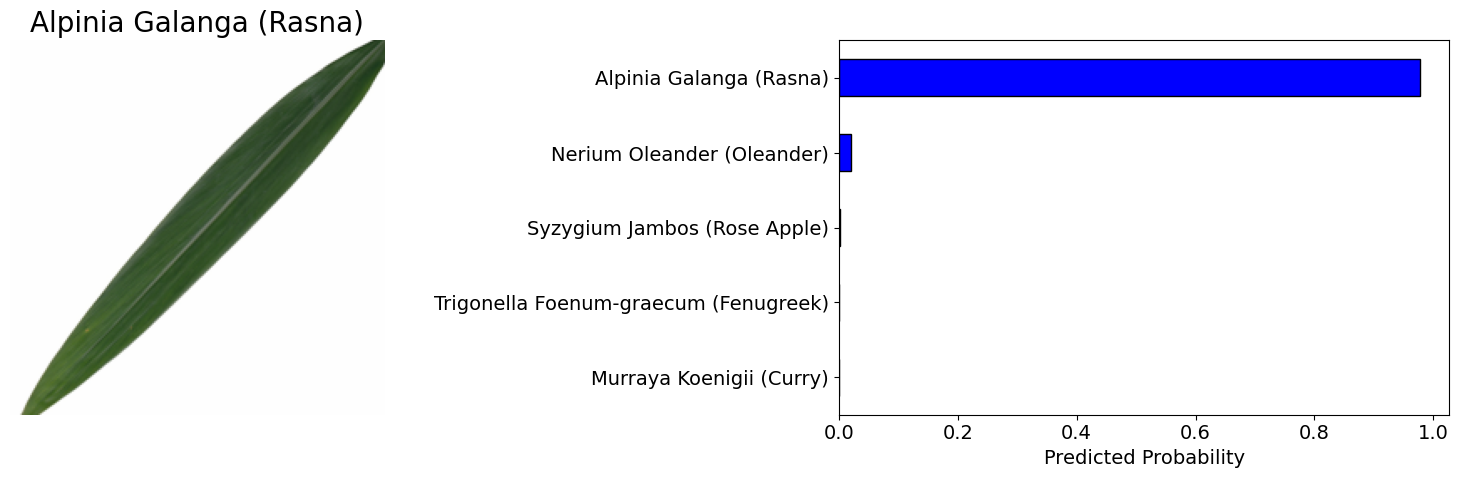

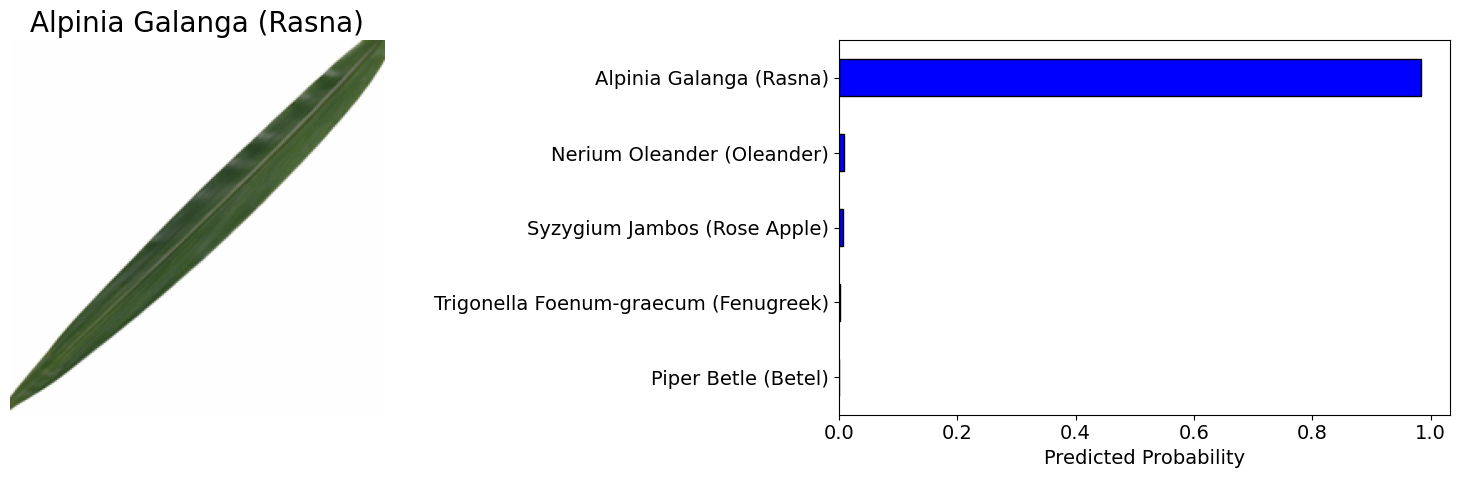

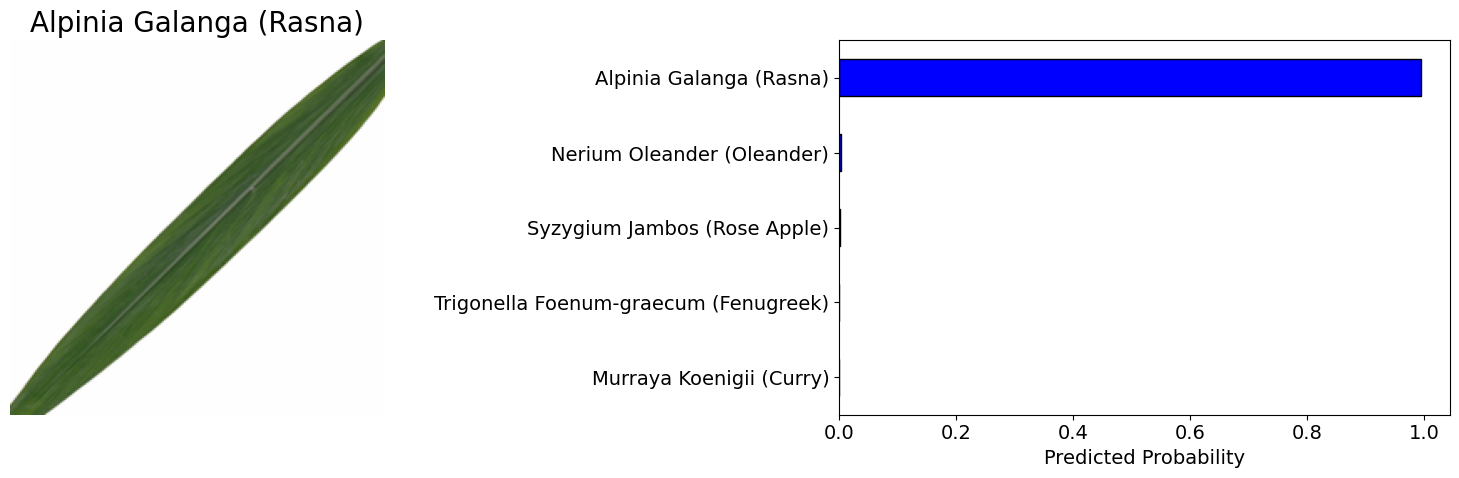

In [92]:
display_category(model, 'Alpinia Galanga (Rasna)', n = 3 )

## **Test Time Augmentation**

In [93]:
# Image transformations
tta_random_image_transforms = transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ])

In [94]:
# Datasets from folders
ttadata = {
    'test':
    datasets.ImageFolder(root=testdir, transform=tta_random_image_transforms)
}

# Dataloader iterators
ttadataloader = {
    'test': DataLoader(ttadata['test'], batch_size=512, shuffle=False,num_workers=0)
}

In [95]:
def tta_preds_n_averaged(model, test_loader,n=5):
    """
    Returns the TTA preds from a trained PyTorch model

    Params
    --------
        model (PyTorch model): trained cnn for inference
        test_loader (PyTorch DataLoader): test dataloader

    Returns
    --------
        results (array): results for each category
    """

    # Hold results
    results = np.zeros((len(test_loader.dataset), n_classes))
    bs = test_loader.batch_size
    model.eval()
    with torch.no_grad():
        #aug loop:
        for _ in range(n):
            # Testing loop
            tmp_pred = np.zeros((len(test_loader.dataset), n_classes))
            for i,(data, targets) in enumerate(tqdm.tqdm(test_loader)):

                # Tensors to gpu
                if train_on_gpu:
                    data, targets = data.to('cuda'), targets.to('cuda')

                # Raw model output
                out = model(data)
                tmp_pred[i*bs:(i+1)*bs] = np.array(out.cpu())

            results+=tmp_pred
    return results/n

In [96]:
preds_tta = tta_preds_n_averaged(model, ttadataloader['test'])

100%|██████████| 1/1 [00:08<00:00,  8.34s/it]


In [97]:
preds_tta_index = np.argmax(preds_tta,axis=1)
print(f"TTA Accuracy: {sum(ttadata['test'].targets==preds_tta_index)/len(preds_tta_index)}")

TTA Accuracy: 0.9918256130790191


In [98]:
preddf = pd.DataFrame({'ttapreds':preds_tta_index,'truelabel':ttadata['test'].targets})
preddf['tta_acc'] = preddf['ttapreds'] == preddf['truelabel']
preddf['class'] = preddf['truelabel'].apply(lambda x: idx_to_class[x])
category_tta= preddf.groupby(['class']).aggregate({'tta_acc':np.mean}).reset_index()

In [99]:
ttaresults = results.merge(category_tta,on='class',how='left')[['class','top1','tta_acc', 'train_cnt', 'val_cnt',
       'test_cnt']]

In [100]:
ttaresults.columns = ['class', 'normal_acc', 'tta_acc', 'train_cnt', 'val_cnt', 'test_cnt']

In [101]:
ttaresults['tta_acc']*=100

In [102]:
ttaresults

,class,normal_acc,tta_acc,train_cnt,val_cnt,test_cnt
0,Alpinia Galanga (Rasna),100.000000,100.0,30,10,10
1,Amaranthus Viridis (Arive-Dantu),95.833333,100.0,73,25,24
2,Artocarpus Heterophyllus (Jackfruit),100.000000,100.0,33,11,12
3,Azadirachta Indica (Neem),100.000000,100.0,36,12,12
4,Basella Alba (Basale),100.000000,100.0,62,21,20
5,Brassica Juncea (Indian Mustard),100.000000,100.0,20,7,7
6,Carissa Carandas (Karanda),100.000000,100.0,44,15,15
7,Citrus Limon (Lemon),100.000000,100.0,34,11,12
8,Ficus Auriculata (Roxburgh fig),70.000000,70.0,30,10,10
9,Ficus Religiosa (Peepal Tree),100.000000,100.0,38,12,13


### **TFLITE**

In [ ]:
!pip install onnx
!pip install tf2onnx
!pip install onnx_tf

## Converting the model to TFlite

In [147]:
import onnx_tf

# Load the PyTorch ResNet50 model

path = '/content/resnet50-transfer.pth'
# Get the model name

checkpoint = torch.load(path, map_location = torch.device('cpu'))

model = models.resnet50( weights = None )

model.fc = checkpoint['fc']

# Load in the state dict
model.load_state_dict(checkpoint['state_dict'])

# Model basics
model.class_to_idx = checkpoint['class_to_idx']
model.idx_to_class = checkpoint['idx_to_class']
model.epochs = checkpoint['epochs']

model.eval()

# Export the PyTorch model to ONNX format
input_shape = (1, 3, 224, 224)
dummy_input = torch.randn(input_shape)
onnx_model_path = 'resnet50.onnx'
torch.onnx.export(model, dummy_input, onnx_model_path,  input_names=['input'], output_names=['output'], verbose=False)

# Load the ONNX model
onnx_model = onnx.load(onnx_model_path)

# Convert the ONNX model to TensorFlow format
tf_model_path = 'resnet50.pb'
tf_rep = onnx_tf.backend.prepare(onnx_model)
tf_rep.export_graph(tf_model_path)

# Convert the TensorFlow model to TensorFlow Lite format
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(tf_model_path)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('resnet50.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:absl:Function `__call__` contains input name(s) x, y with unsupported characters which will be renamed to transpose_162_x, mul_1_y in the SavedModel.
INFO:absl:Found untraced functions such as gen_tensor_dict while saving (showing 1 of 1). These functions will not be directly callable after loading.
INFO:absl:Writing fingerprint to resnet50.pb/fingerprint.pb
INFO:absl:Using experimental converter: If you encountered a problem please file a bug. You can opt-out by setting experimental_new_converter=False


## Testin inference ( somehow the accuracy dropped significantly )

In [166]:
# Load the TFLite model (replace 'model.tflite' with your file name)
model_path = '/content/resnet50.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Load and preprocess your image
image_path = '/content/data/test/Alpinia Galanga (Rasna)/AG-S-006.jpg'  # Replace with your image file path
image = Image.open(image_path)
image = image.resize((224, 224))  # Adjust the size as needed
image = np.array(image)
image = image / 255.0  # Normalize pixel values to [0, 1]

# Ensure the image shape matches the input shape of your model
input_data = np.expand_dims(image, axis=0).astype(np.float32)  # Add a batch dimension and cast to FLOAT32
input_data = np.transpose(input_data, (0, 3, 1, 2))
print(np.shape(input_data))

# Set the input tensor
input_details = interpreter.get_input_details()
# print(input_details)
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()

# Get the output tensor details
output_details = interpreter.get_output_details()

# Get the output data (predictions)
output_data = interpreter.get_tensor(output_details[0]['index'])
logits = output_data

class_probabilities = (np.exp(logits) / np.sum(np.exp(logits), axis=1))

# Get the index of the class with the highest probability (the predicted class)
predicted_class = np.argmax(class_probabilities)

predicted_class_probability = class_probabilities[0][predicted_class]

# Process and interpret the output as needed
# print("Model predictions:", output_data)

# Get the name of the predicted class
predicted_class_name = model.idx_to_class[predicted_class]
print(f"Model predictions: {predicted_class_name} and Confidence Level : {predicted_class_probability}")

# Print the name of the predicted class
print("Predicted Class Name:", predicted_class_name)

print(class_probabilities)

(1, 3, 224, 224)
[[ -0.55900216  -9.061857    -9.448008    -6.2010984   -8.376883
   -7.942148    -6.9195175   -7.875105    -6.697874    -8.261106
   -6.1319294   -9.457909    -3.863789    -8.112614    -5.5372047
   -8.523358    -5.7977257   -3.0919      -7.7827806   -7.7966595
   -5.398447    -6.112218    -8.097801   -10.08227    -10.585562
  -10.263716    -8.4636755   -4.6079674  -10.304787    -1.1140165 ]]
Model predictions: Alpinia Galanga (Rasna) and Confidence Level : 0.5717793703079224
Predicted Class Name: Alpinia Galanga (Rasna)
[[5.7177937e-01 1.1600733e-04 7.8846504e-05 2.0272026e-03 2.3012623e-04
  3.5544205e-04 9.8830659e-04 3.8008910e-04 1.2335315e-03 2.5837318e-04
  2.1723853e-03 7.8069686e-05 2.0988323e-02 2.9973441e-04 3.9375178e-03
  1.9877077e-04 3.0344478e-03 4.5415577e-02 4.1685143e-04 4.1110601e-04
  4.5236005e-03 2.2156313e-03 3.0420729e-04 4.1814405e-05 2.5278361e-05
  3.4875859e-05 2.1099513e-04 9.9720675e-03 3.3472490e-05 3.2823795e-01]]
